# Datos

In [1]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import files

# El siguiente archivo solicitado es para habilitar la API de Kaggle en el entorno que está trabajando.
# Este archivo se descarga entrando a su perfíl de Kaggle, en la sección API, presionando donde dice: Create New API Token

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
#Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [2]:
!pip install comet_ml

#import comet_ml at the top of your file
from comet_ml import Experiment

     |████████████████████████████████| 266kB 9.6MB/s 
     |████████████████████████████████| 522kB 49.8MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-cp37-none-any.whl size=34547 sha256=b8f522780217bde354ddb1351f72f9b3cb4402412128f806c6a9af83b89ac95e
  Stored in directory: /root/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
Successfully built configobj


In [2]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# Descarga de datos
!kaggle datasets download -d giantuji/UjiIndoorLoc


  0% 0.00/1.51M [00:00<?, ?B/s]
100% 1.51M/1.51M [00:00<00:00, 49.8MB/s]


In [3]:
from zipfile import ZipFile
zip_file = ZipFile('UjiIndoorLoc.zip')
df = pd.read_csv(zip_file.open('TrainingData.csv'))
df.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,...,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-92,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [4]:
df = df[df.BUILDINGID == 1]

In [5]:
df.groupby('FLOOR').count()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,...,WAP489,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
FLOOR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,...,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368,1368
1,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,...,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484
2,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,...,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396,1396
3,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,...,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948


In [6]:
df_X = df.iloc[:,:520]
df_y = df['FLOOR']
print(df_X.shape)

df_X.values[df_X.values==100] = -105

df_X.describe()

(5196, 520)


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,...,WAP481,WAP482,WAP483,WAP484,WAP485,WAP486,WAP487,WAP488,WAP489,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
count,5196.0,5196.0,5196.0,5196.0,5196.0,5196.000000,5196.0,5196.000000,5196.0,5196.000000,5196.000000,5196.000000,5196.0,5196.0,5196.000000,5196.000000,5196.000000,5196.0,5196.0,5196.0,5196.000000,5196.000000,5196.000000,5196.000000,5196.0,5196.0,5196.000000,5196.000000,5196.000000,5196.000000,5196.0,5196.0,5196.0,5196.0,5196.000000,5196.000000,5196.000000,5196.000000,5196.0,5196.0,...,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.000000,5196.000000,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.000000,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0,5196.0
mean,-105.0,-105.0,-105.0,-105.0,-105.0,-103.945727,-105.0,-102.396459,-105.0,-104.776174,-104.625674,-104.611239,-105.0,-105.0,-101.272325,-101.549846,-104.994419,-105.0,-105.0,-105.0,-104.923210,-104.921286,-104.779253,-104.785027,-105.0,-105.0,-104.770015,-104.722479,-104.890878,-104.883949,-105.0,-105.0,-105.0,-105.0,-104.363356,-104.403772,-100.761162,-101.487490,-105.0,-105.0,...,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-104.953811,-104.970169,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-103.218245,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0
std,0.0,0.0,0.0,0.0,0.0,4.845698,0.0,8.192620,0.0,1.782316,2.587262,2.761160,0.0,0.0,8.174818,7.544492,0.232507,0.0,0.0,0.0,0.922853,0.944953,2.078155,2.063145,0.0,0.0,2.165979,2.809917,1.263474,1.300257,0.0,0.0,0.0,0.0,3.478685,3.505005,10.834716,10.074832,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.858509,0.633425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.317803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-105.0,-105.0,-105.0,-105.0,-105.0,-105.000000,-105.0,-105.000000,-105.0,-105.000000,-105.000000,-105.000000,-105.0,-105.0,-105.000000,-105.000000,-105.000000,-105.0,-105.0,-105.0,-105.000000,-105.000000,-105.000000,-105.000000,-105.0,-105.0,-105.000000,-105.000000,-105.000000,-105.000000,-105.0,-105.0,-105.0,-105.0,-105.000000,-105.000000,-105.000000,-105.000000,-105.0,-105.0,...,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.000000,-105.000000,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.000000,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0
25%,-105.0,-105.0,-105.0,-105.0,-105.0,-105.000000,-105.0,-105.000000,-105.0,-105.000000,-105.000000,-105.000000,-105.0,-105.0,-105.000000,-105.000000,-105.000000,-105.0,-105.0,-105.0,-105.000000,-105.000000,-105.000000,-105.000000,-105.0,-105.0,-105.000000,-105.000000,-105.000000,-105.000000,-105.0,-105.0,-105.0,-105.0,-105.000000,-105.000000,-105.000000,-105.000000,-105.0,-105.0,...,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.000000,-105.000000,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.000000,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0,-105.0
50%,-105.0,-105.0,-105.0,-105.0,-105.0,-105.000000,-105.0,-105.000000,-105.0,-105.000000,-105.000000,-105.000000,-105.0,-105.0,-105.000000,-105.000000,-105.000000,-105.0,-105.0,-105.0,-105.000000,-105.000000,-105.000000,-105.000000,-105.0,-105.0,-105.0000

In [7]:
ap = (df_X.describe().iloc[2]>1).index
values = (df_X.describe().iloc[2]>1).values
ap_buil_2 = [ap[i] for i in range(len(values)) if values[i]==True]
df_X = df_X[ap_buil_2]
print(df_X.shape)
df_X.describe()

(5196, 166)


,WAP006,WAP008,WAP010,WAP011,WAP012,WAP015,WAP016,WAP023,WAP024,WAP027,WAP028,WAP029,WAP030,WAP035,WAP036,WAP037,WAP038,WAP045,WAP046,WAP055,WAP056,WAP077,WAP078,WAP082,WAP083,WAP084,WAP085,WAP086,WAP088,WAP089,WAP090,WAP091,WAP101,WAP102,WAP103,WAP104,WAP105,WAP106,WAP107,WAP108,...,WAP295,WAP310,WAP311,WAP312,WAP313,WAP314,WAP315,WAP316,WAP317,WAP318,WAP323,WAP329,WAP334,WAP338,WAP340,WAP342,WAP344,WAP351,WAP366,WAP367,WAP368,WAP369,WAP370,WAP371,WAP372,WAP374,WAP375,WAP380,WAP386,WAP390,WAP394,WAP396,WAP398,WAP400,WAP405,WAP418,WAP432,WAP439,WAP478,WAP503
count,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,...,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.00000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000,5196.000000
mean,-103.945727,-102.396459,-104.776174,-104.625674,-104.611239,-101.272325,-101.549846,-104.779253,-104.785027,-104.770015,-104.722479,-104.890878,-104.883949,-104.363356,-104.403772,-100.761162,-101.487490,-104.683988,-104.490955,-104.922055,-104.913780,-104.862009,-104.890108,-104.419361,-104.426289,-104.614511,-104.584103,-104.862394,-101.311201,-101.173980,-100.352194,-100.384911,-100.236913,-100.291186,-99.967475,-99.440339,-99.812741,-100.113549,-98.923980,-98.850269,...,-100.636451,-102.868360,-103.486721,-102.683410,-101.801771,-101.346805,-101.788299,-101.332179,-100.926289,-102.075058,-104.734988,-100.948422,-100.786952,-101.755774,-99.976905,-104.732102,-101.066782,-100.721709,-103.114896,-103.438607,-102.697460,-101.849115,-101.962086,-101.783487,-101.44438,-101.131062,-101.941878,-104.792148,-101.307737,-101.474403,-102.054657,-100.290608,-104.799269,-101.262702,-100.803310,-104.929176,-104.904349,-104.939761,-102.661855,-103.218245
std,4.845698,8.192620,1.782316,2.587262,2.761160,8.174818,7.544492,2.078155,2.063145,2.165979,2.809917,1.263474,1.300257,3.478685,3.505005,10.834716,10.074832,1.969992,3.335768,1.043928,1.104316,1.601615,1.433160,3.811164,3.656175,3.143745,3.216723,1.638599,10.785776,10.732577,10.672818,10.595968,11.742893,11.630222,11.695079,12.328207,12.420347,11.567029,12.360599,12.373289,...,11.753764,7.237401,6.090781,7.215562,11.494852,11.909775,11.961014,12.628555,11.983312,10.634398,2.170858,12.892464,12.271371,11.986832,12.923669,2.299060,11.490816,11.617696,6.790930,6.275691,7.341346,11.434525,11.259777,11.952951,12.45044,11.587951,10.723782,1.698412,12.463142,11.690355,11.675484,12.619303,2.059539,11.211884,11.533798,1.087857,1.278493,1.245755,7.050524,6.317803
min,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,...,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.000000,-105.00000

In [8]:
df_X.iloc[:,:] = 105 + df_X.values
df_X['FLOOR'] = df_y.values 

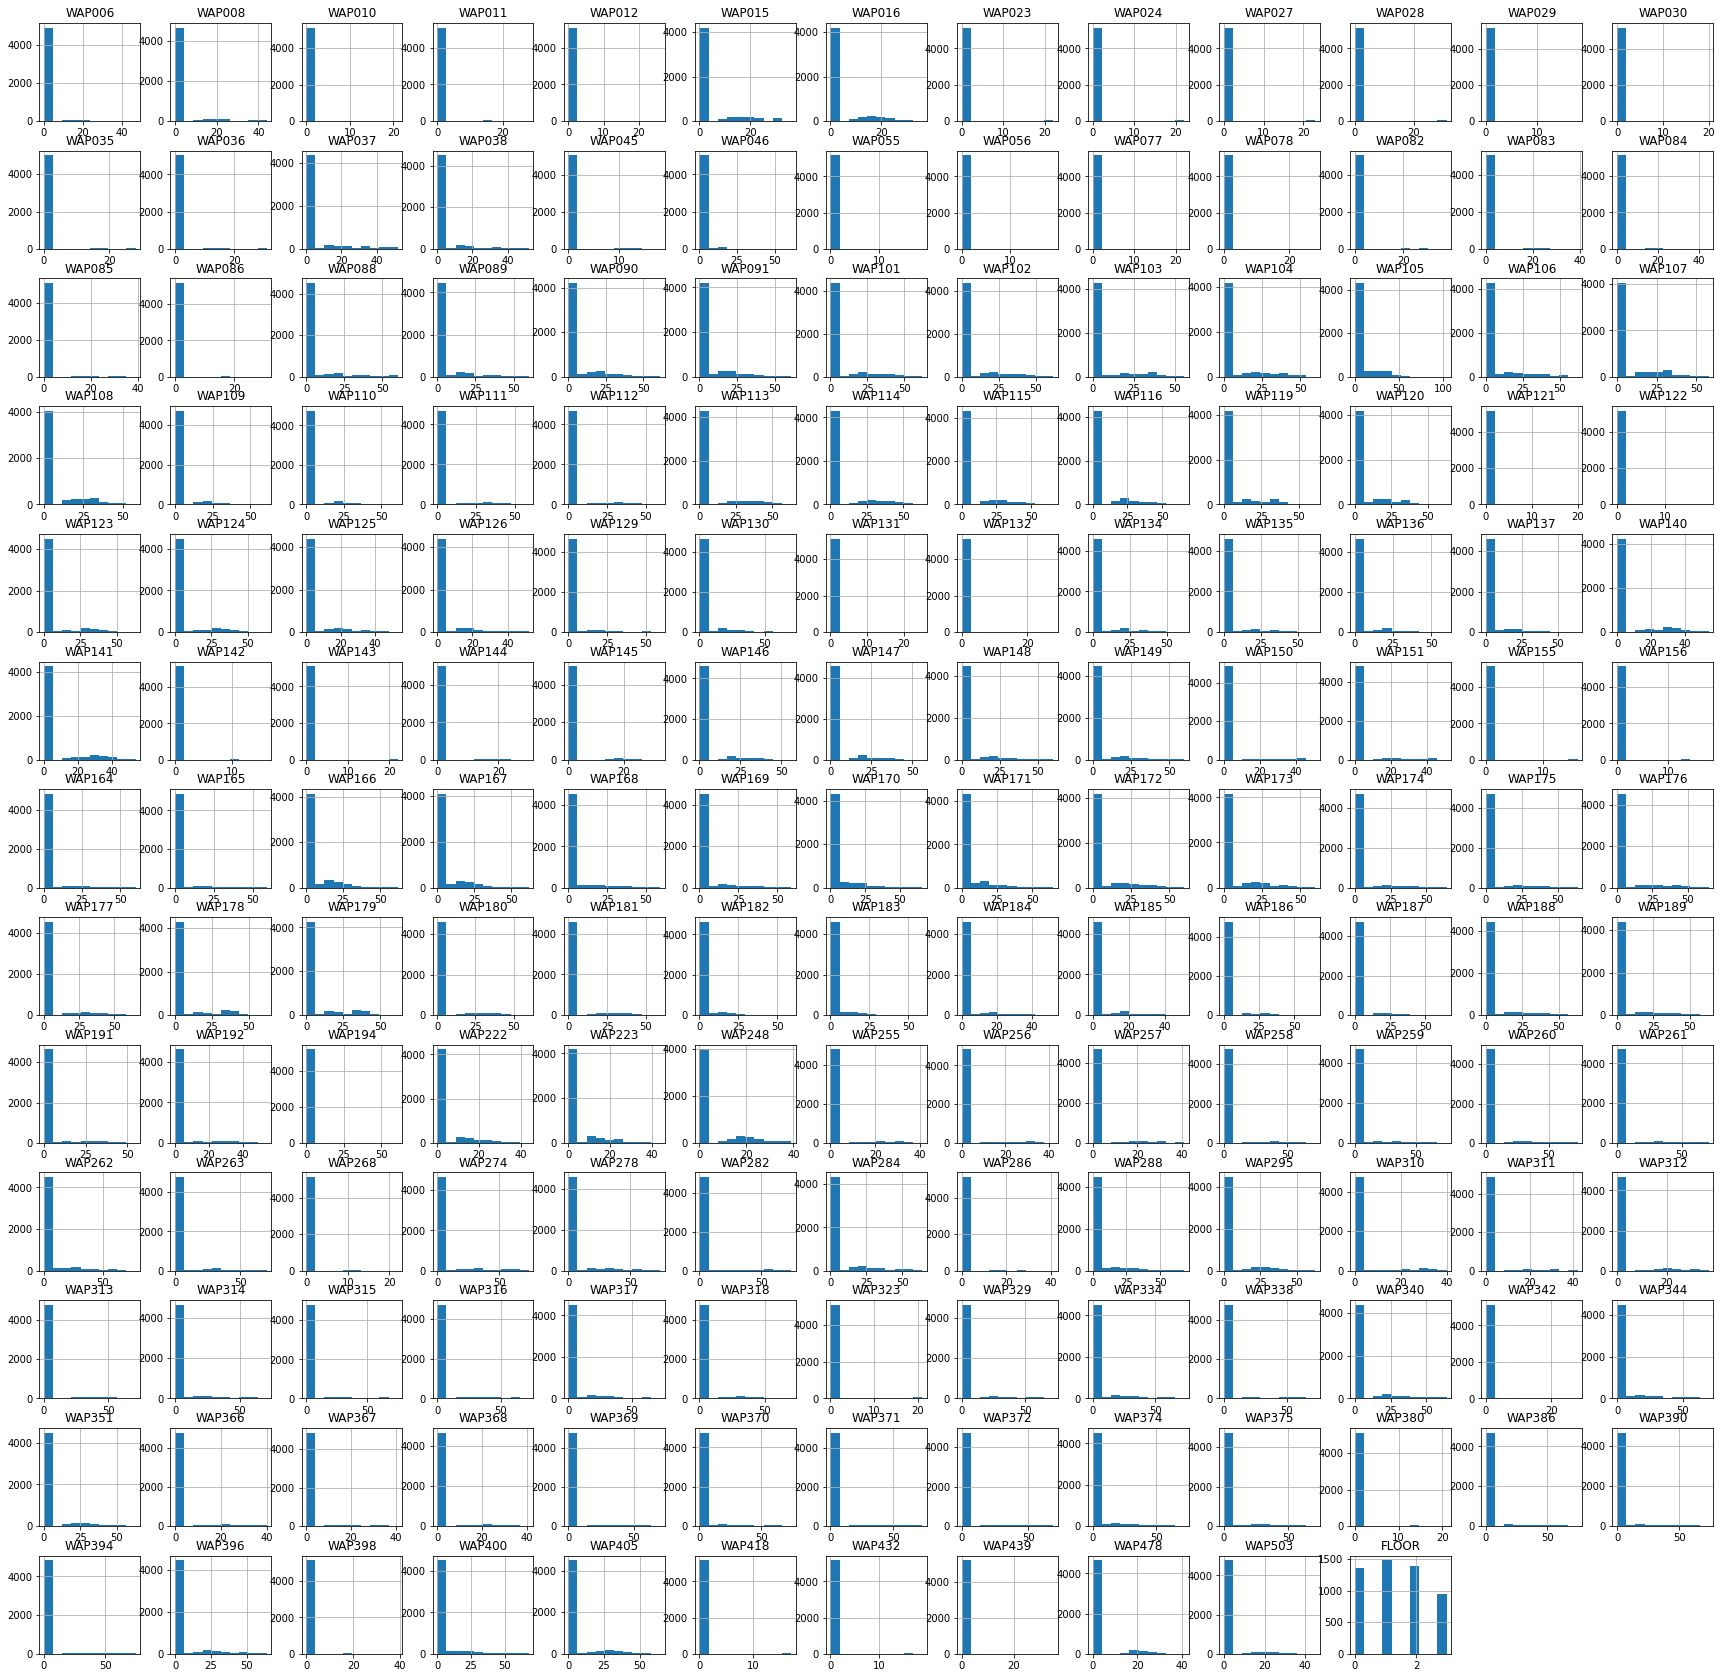

In [9]:
df_X.hist(figsize=[30,30])
plt.show()

In [10]:
import networkx as nx
!git clone https://github.com/alelab-upenn/graph-neural-networks
import sys
sys.path.append('/content/graph-neural-networks/')
#necesita hdf5storage ...
!pip install hdf5storage

import alegnn.modules.architectures as architectures
import alegnn.utils.graphML as graphML
# no sé porqué le cambian los parámetros por defecto a pyplot... por lo menos le saco el latex que en colab no funciona por defecto.
plt.rcParams.update({"text.usetex": False})

import torch

Cloning into 'graph-neural-networks'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 156 (delta 40), reused 48 (delta 19), pack-reused 74
Receiving objects: 100% (156/156), 47.47 MiB | 28.80 MiB/s, done.
Resolving deltas: 100% (68/68), done.
     |████████████████████████████████| 61kB 4.0MB/s 


In [11]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
enc = OrdinalEncoder(dtype=np.int)
y = enc.fit_transform(df_X['FLOOR'].values.reshape(-1,1))
X = df_X.iloc[:,:-1].values

In [12]:
import networkx as nx

def graph_creator(X_G, columns, th=10):
  df_data_train = pd.DataFrame(X_G, columns=columns)
  df_G = pd.DataFrame(columns = ['from', 'to', 'weight']) 

  for i in df_X.columns[:-1]:
    max_val = df_data_train[i].max()
    df_aux_i = df_data_train[df_data_train[i]  > (max_val - th)]
    df_aux_i = df_aux_i.drop(i, axis=1) 
    df_aux_i.head()

  for k, v in df_aux_i.mean().items():
    df_G = df_G.append({'from':i, 'to': k, 'weight': v}, ignore_index=True)

  G = nx.from_pandas_edgelist(df_G, source='from', target='to', edge_attr='weight')  # create_using=nx.DiGraph

  W = nx.to_numpy_array(G)
  # por último le saco la diagonal y la normalizo por su vector propio más grande
  np.fill_diagonal(W,0)
  (w,v) = scipy.sparse.linalg.eigs(W, k=1,which='LM')
  W = W/np.abs(w[0])

  return G, W

In [13]:
def train_model_simple(model, train_data, test_data, batch_size=32, n_epochs=100, epsilon=0.005, weight_decay=1e-2):
    
  optimizer = torch.optim.Adam(model.parameters(), lr=epsilon, weight_decay=weight_decay)

  train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=False)
  test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=len(test_data), shuffle=False)
  loss = torch.nn.CrossEntropyLoss()
  for epoch in range(n_epochs):
      for x_batch, y_batch in train_loader:
        if y_batch.shape[0] == batch_size:
          model.zero_grad()
          y_hat = model(x_batch)
          loss_result = loss(y_hat, y_batch.reshape(batch_size).type(torch.long))
          loss_result.backward()
          optimizer.step()
        else:
          break

  for x_batch, y_batch in test_loader:
      y_hattest = model(x_batch)
    
  return (model, y_hattest)

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score, classification_report
import scipy
from sklearn.preprocessing import StandardScaler

In [16]:

#Create an experiment with your api key
experiment = Experiment(
    api_key="krnsqImdHJjs4Y1RdFTqfrtjd",
    project_name="aagrafos",
    workspace="facundolezama",
    log_code=True
)

experiment.set_name('ujiindoorloc BUILDING 1')
experiment.add_tag('ujiindoorloc BUILDING 1')

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/facundolezama/aagrafos/da23f85ed34847888df53ce4daecddfa



In [16]:
k=5

kf = KFold(n_splits=k)

lr_list = [1e-3, 1e-4]
bs_list = [64, 128] 
wd_list = [1e-3, 1e-4]
n_fil = [1, 3, 5]

param_grid = {'lr': lr_list, 'bs': bs_list, 'wd': wd_list, 'nfil': n_fil}

best_score = 0
best_params = None

columns = df_X.columns[:-1]

nodos = len(columns)

output_len = len(df_X['FLOOR'].value_counts())

epochs = 20

In [ ]:
for param in list(ParameterGrid(param_grid)):

  ACC = 0
  for train_index, val_index in kf.split(X):
    X_train_cv, X_val_cv = X[train_index], X[val_index]
    y_train_cv, y_val_cv = y[train_index], y[val_index]

    Graph, W = graph_creator(X_train_cv[:,:nodos+1], columns, th=10) #el grafo lo armo solo con los datos de 2.4Ghz
    gnn_model = architectures.SelectionGNN(dimNodeSignals=[1, 20, 20], nFilterTaps=[param['nfil'],param['nfil']], bias=True, nonlinearity=torch.nn.ReLU, nSelectedNodes=[nodos, nodos], poolingFunction=graphML.NoPool, poolingSize=[1, 1], dimLayersMLP=[output_len], GSO=torch.from_numpy(W).float())

    scaler = StandardScaler()
    X_train_cv = scaler.fit_transform(X_train_cv)
    X_val_cv = scaler.transform(X_val_cv)

    x_training_data = np.reshape(X_train_cv,(X_train_cv.shape[0],1,nodos))
    x_val_data = np.reshape(X_val_cv,(X_val_cv.shape[0],1,nodos))
    y_training_data = np.reshape(y_train_cv,(y_train_cv.shape[0],1,1))
    y_val_data = np.reshape(y_val_cv,(y_val_cv.shape[0],1,1))

    train_data = torch.utils.data.TensorDataset(torch.from_numpy(x_training_data).float(), torch.from_numpy(y_training_data).float())
    val_data = torch.utils.data.TensorDataset(torch.from_numpy(x_val_data).float(), torch.from_numpy(y_val_data).float())

    trained_gnn_model, y_pred = train_model_simple(gnn_model, train_data, val_data, n_epochs=epochs, epsilon=param['lr'], batch_size=param['bs'], weight_decay=param['wd'])

    m = torch.nn.Softmax(dim=1)
    output = m(y_pred)
    ACC += accuracy_score(y_val_cv, np.array(torch.argmax(output, axis=1)))/k

  if ACC > best_score:
      best_score = ACC
      best_params = param

  print("params: ", param)
  print("Accuracy: ", ACC) 
  print()

print("----------- BEST PARAMS --------------")
print("params: ", best_params)
print("Accuracy: ", best_score) 
print()


experiment.log_parameters({'tag': 'ujiindoorloc BUILDING 1', 'epochs': epochs, 'nodes': nodos, 'class_len': output_len, 'dimNodeSignals':[1, 20, 20]})
experiment.log_parameters(best_params)
experiment.log_metrics({"accuracy_val": best_score})

# Test

In [17]:
from zipfile import ZipFile
zip_file = ZipFile('UjiIndoorLoc.zip')
df_test = pd.read_csv(zip_file.open('ValidationData.csv'))
df_test.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,WAP013,WAP014,WAP015,WAP016,WAP017,WAP018,WAP019,WAP020,WAP021,WAP022,WAP023,WAP024,WAP025,WAP026,WAP027,WAP028,WAP029,WAP030,WAP031,WAP032,WAP033,WAP034,WAP035,WAP036,WAP037,WAP038,WAP039,WAP040,...,WAP490,WAP491,WAP492,WAP493,WAP494,WAP495,WAP496,WAP497,WAP498,WAP499,WAP500,WAP501,WAP502,WAP503,WAP504,WAP505,WAP506,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-91,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,-87,-87,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,-73,-72,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,-77,-75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,100,100,-79,-79,100,100,100,100,100,100,100,100,-83,-78,100,100,100,100,-62,-62,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


In [18]:
df_test = df_test[df_test.BUILDINGID == 1]
df_X_test = df_test.loc[:,columns]
df_y_test = df_test['FLOOR']
print(df_X_test.shape)

df_X_test.values[df_X_test.values==100] = -105
df_X_test.iloc[:,:] = 105 + df_X_test.values
df_X_test['FLOOR'] = df_y_test.values 

df_X_test.describe()

(307, 166)


,WAP006,WAP008,WAP010,WAP011,WAP012,WAP015,WAP016,WAP023,WAP024,WAP027,WAP028,WAP029,WAP030,WAP035,WAP036,WAP037,WAP038,WAP045,WAP046,WAP055,WAP056,WAP077,WAP078,WAP082,WAP083,WAP084,WAP085,WAP086,WAP088,WAP089,WAP090,WAP091,WAP101,WAP102,WAP103,WAP104,WAP105,WAP106,WAP107,WAP108,...,WAP310,WAP311,WAP312,WAP313,WAP314,WAP315,WAP316,WAP317,WAP318,WAP323,WAP329,WAP334,WAP338,WAP340,WAP342,WAP344,WAP351,WAP366,WAP367,WAP368,WAP369,WAP370,WAP371,WAP372,WAP374,WAP375,WAP380,WAP386,WAP390,WAP394,WAP396,WAP398,WAP400,WAP405,WAP418,WAP432,WAP439,WAP478,WAP503,FLOOR
count,307.0,307.000000,307.000000,307.000000,307.00000,307.000000,307.000000,307.0,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.0,307.0,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,...,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.0,307.0,307.0,307.0,307.0,307.0,307.0,307.0,307.0,307.0,307.0,307.0,307.0,307.0,307.0,307.0,307.0,307.0,307.0,307.0,307.000000,307.0,307.000000
mean,0.0,1.921824,0.374593,0.540717,0.62215,3.013029,3.583062,0.0,0.097720,0.241042,0.130293,0.100977,0.107492,0.241042,0.068404,5.716612,5.970684,0.201954,0.175896,0.0,0.0,0.289902,0.306189,0.576547,0.719870,0.530945,0.371336,0.091205,8.986971,9.172638,5.296417,5.296417,2.169381,2.299674,7.205212,7.065147,6.899023,6.768730,0.615635,0.615635,...,1.706840,1.742671,1.635179,1.622150,1.729642,1.146580,2.136808,1.247557,1.706840,0.032573,2.104235,1.755700,0.856678,3.263844,0.302932,1.237785,2.345277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.218241,0.0,1.491857
std,0.0,6.476737,2.543685,3.466102,3.70575,7.649159,7.750739,0.0,1.208722,2.199348,1.683045,1.249666,1.330208,2.234725,1.198533,11.830826,12.138193,2.068657,1.797331,0.0,0.0,2.550919,2.671086,3.434233,3.923246,3.250166,2.768679,1.228004,16.793434,16.625424,11.455801,11.429240,8.513962,8.576154,15.815942,15.511612,15.061949,14.957082,4.587795,4.574241,...,5.675776,6.008891,5.803183,7.393286,8.026622,6.495449,8.687805,6.777796,6.886478,0.570730,8.286666,7.811228,5.144860,8.943108,2.165405,6.440183,8.307686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.581907,0.0,0.868342
min,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000
50%,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [19]:
escaler = StandardScaler()
X = escaler.fit_transform(X)

y_test = enc.transform(df_X_test['FLOOR'].values.reshape(-1,1))
X_test = df_X_test.iloc[:,:-1].values
X_test = escaler.transform(X_test)

x_training_data = np.reshape(X,(X.shape[0],1,nodos))
x_test_data = np.reshape(X_test,(X_test.shape[0],1,nodos))
y_training_data = np.reshape(y,(y.shape[0],1,1))
y_test_data = np.reshape(y_test,(y_test.shape[0],1,1))

train_data = torch.utils.data.TensorDataset(torch.from_numpy(x_training_data).float(), torch.from_numpy(y_training_data).float())
test_data = torch.utils.data.TensorDataset(torch.from_numpy(x_test_data).float(), torch.from_numpy(y_test_data).float())

In [20]:
best_params=  {'bs': 64, 'lr': 0.001, 'nfil': 3, 'wd': 0.0001}

In [21]:
Graph, W = graph_creator(X[:,:nodos+1], columns, th=10)

gnn_model = architectures.SelectionGNN(dimNodeSignals=[1, 20, 20], nFilterTaps=[best_params['nfil'],best_params['nfil']], bias=True, nonlinearity=torch.nn.ReLU, nSelectedNodes=[nodos, nodos], poolingFunction=graphML.NoPool, poolingSize=[nodos, nodos], dimLayersMLP=[output_len], GSO=torch.from_numpy(W).float())

(trained_gnn_model, y_hattest) = train_model_simple(gnn_model, train_data, test_data, n_epochs=epochs, epsilon=best_params['lr'], batch_size=best_params['bs'], weight_decay=best_params['wd'])

m = torch.nn.Softmax(dim=1)
output = m(y_hattest)   
ACC_test = accuracy_score(y_test, np.array(torch.argmax(output, axis=1)))

print(ACC_test)

experiment.log_metrics({"accuracy_test": ACC_test})

0.8241042345276873


NameError: ignored

In [ ]:
experiment.end()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(classification_report(y_test, np.array(torch.argmax(output, axis=1))))

plt.figure(figsize=[15,10])
cf_matrix = confusion_matrix(y_test, np.array(torch.argmax(output, axis=1)), normalize=None)
sns.heatmap(cf_matrix, annot=True)

# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier(n_neighbors=15)
param = {'n_neighbors': [5, 10, 15]}

clf_knn= GridSearchCV(neigh, param)
clf_knn.fit(X, y)


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=15, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [5, 10, 15]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [24]:
print(clf_knn.best_params_)
print(clf_knn.best_score_)

{'n_neighbors': 10}
0.8839535055896942


In [25]:
K = clf_knn.best_params_['n_neighbors']
neigh = KNeighborsClassifier(n_neighbors=K)
neigh.fit(X, y)
y_pred_knn = neigh.predict(X_test)

In [26]:
print(accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

COMET WARNING: Empty mapping given to log_params({}); ignoring


0.6807817589576547
              precision    recall  f1-score   support

           0       0.48      0.53      0.51        30
           1       0.93      0.52      0.66       143
           2       0.57      0.89      0.69        87
           3       0.71      0.89      0.79        47

    accuracy                           0.68       307
   macro avg       0.67      0.71      0.66       307
weighted avg       0.75      0.68      0.68       307



# FCNN

In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
clf = MLPClassifier().fit(X, y)
y_pred_fcnn = clf.predict(X_test)

In [30]:
print(accuracy_score(y_test, y_pred_fcnn))
print(classification_report(y_test, y_pred_fcnn))

0.7785016286644951
              precision    recall  f1-score   support

           0       0.46      0.73      0.56        30
           1       0.92      0.70      0.79       143
           2       0.76      0.90      0.82        87
           3       0.83      0.83      0.83        47

    accuracy                           0.78       307
   macro avg       0.74      0.79      0.75       307
weighted avg       0.81      0.78      0.78       307

